In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from sklearn.svm import SVR

In [4]:
iris = pd.read_csv('tableconvert_2019-11-21_093602.csv')

In [5]:
y = iris['petal.width']
x = iris['petal.length']

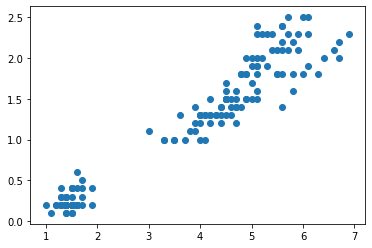

In [6]:
plt.scatter(x,y)

In [7]:
data_x = pd.DataFrame(x)
data_y = pd.DataFrame(y)

In [8]:
data_x_opetus, data_x_validointi, data_y_opetus, data_y_validointi = train_test_split(
    data_x, data_y, test_size=0.2, random_state=42)

In [42]:
svr_rbf_malli = SVR(kernel = 'linear', C=100, gamma=0.1, epsilon=0.1)

In [43]:
svr_rbf_malli.fit(data_x_opetus, data_y_opetus.values.ravel())

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [44]:
ennustukset_opetus = svr_rbf_malli.predict(data_x_opetus)
opetus_mse = mean_squared_error(data_y_opetus, ennustukset_opetus)
print(opetus_mse)

0.042429786857222276


In [45]:
ennustukset_validointi = svr_rbf_malli.predict(data_x_validointi)
validointi_mse = mean_squared_error(data_y_validointi, ennustukset_validointi)
print(validointi_mse)

0.043815384206725226


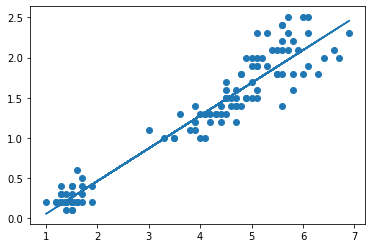

In [46]:
plt.scatter(data_x_opetus,data_y_opetus)
plt.plot(data_x_opetus, ennustukset_opetus)

In [47]:
opetus_mse = np.zeros(10)
opetus_r2 = np.zeros(10)

validointi_mse = np.zeros(10)
validointi_r2 = np.zeros(10)

for i in range(1,10):
    data_x_opetus, data_x_validointi, data_y_opetus, data_y_validointi = train_test_split(
        data_x, data_y, test_size=0.2, random_state=689*i)
    
    svr_rbf_malli.fit(data_x_opetus, data_y_opetus.values.ravel())
    
    ennustukset_opetus = svr_rbf_malli.predict(data_x_opetus)
    opetus_mse[i] = mean_squared_error(data_y_opetus, ennustukset_opetus)
    opetus_r2[i] = r2_score(data_y_opetus, ennustukset_opetus)
    
    ennustukset_validointi = svr_rbf_malli.predict(data_x_validointi)
    validointi_mse[i] = mean_squared_error(data_y_validointi, ennustukset_validointi)
    validointi_r2[i] = r2_score(data_y_validointi, ennustukset_validointi)

In [48]:
print(opetus_mse)
print('\n')
print(np.mean(opetus_mse))

[0.         0.04128059 0.04483097 0.04045896 0.04593026 0.04069916
 0.04608767 0.04341678 0.04502969 0.04242979]


0.03901638675509419


In [49]:
print(validointi_mse)
print('\n')
print(np.mean(validointi_mse))

[0.         0.04667629 0.03492015 0.05055795 0.02951797 0.05277939
 0.02743532 0.038108   0.03110124 0.04381538]


0.03549117077550326


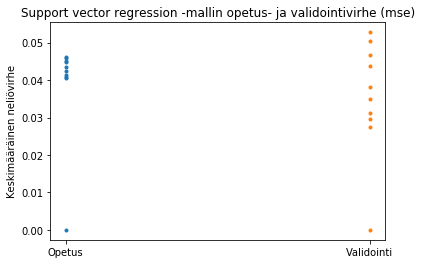

In [50]:
plt.plot(np.ones((10,1)), opetus_mse, '.')
plt.plot(2*np.ones((10,1)), validointi_mse, '.')

plt.title('Support vector regression -mallin opetus- ja validointivirhe (mse)')
plt.xticks([1,2], ['Opetus', 'Validointi'])
plt.ylabel('Keskimääräinen neliövirhe')

plt.show()

In [51]:
print(opetus_r2)
print('\n')
print(np.mean(opetus_r2))

[0.         0.92724383 0.92291786 0.92653834 0.92093712 0.93207845
 0.924603   0.92054474 0.92067233 0.92553238]


0.8321068060084673


In [52]:
print(validointi_r2)
print('\n')
print(np.mean(validointi_r2))

[0.         0.92041403 0.93538756 0.92226637 0.94665962 0.8893488
 0.93665686 0.94261708 0.94938406 0.9271753 ]


0.836990968119439


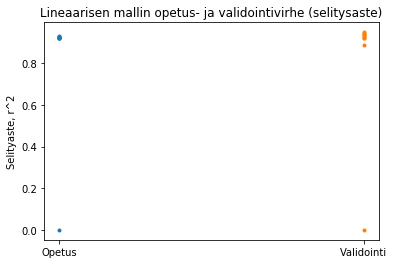

In [53]:
plt.plot(np.ones((10,1)), opetus_r2, '.')
plt.plot(2*np.ones((10,1)), validointi_r2, '.')

plt.title('Lineaarisen mallin opetus- ja validointivirhe (selitysaste)')
plt.xticks([1,2], ['Opetus', 'Validointi'])
plt.ylabel('Selityaste, r^2')

plt.show()